В данном блокноте представлен тематический анализ текста (LDA)

### dataset and preprocessing

In [ ]:
import json

# Открытие JSON-файла для чтения
with open('processed_data.json', 'r') as file:
    data = json.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'processed_data.json'

In [ ]:
result_list = []
# Обход вакансий
for vacancy_data in data:
    # Обход подтвержденных резюме для каждой вакансии
    for resume_data in vacancy_data['confirmed_resumes']:
        # Извлечение ключевой информации
        key_info = resume_data.get('key_info')
        # Проверка, что ключевая информация существует
        if key_info:
            # Добавление ключевой информации в список
            result_list.append(key_info)

for vacancy_data in data:
    for resume_data in vacancy_data['failed_resumes']:
        key_info = resume_data.get('key_info')
        if key_info:
            result_list.append(key_info)

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 27.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
# LDAvis
import pyLDAvis
# import pyLDAvis.gensim  - old version!!!
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import spacy
import nltk
from nltk.corpus import stopwords

# Загрузка стоп-слов из NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update(['from', 'subject', 're', 'edu', 'use'])  # Используйте метод update для добавления элементов во множество

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Preprocessing and tokenize

In [ ]:
# Convert to list
data = result_list

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove single quotes
data = [re.sub("\'", "", sent) for sent in data]

1. Технологический стек включает Java 11, Spring Boot, Hibernate, Spring Data, Spring Security, Maven, Camunda, Postgres, Liquibase, Kafka, jUnit, Mockito, Swagger, Bitbucket. 2. Имеется опыт работы над проектами по управлению складскими помещениями, интеграции call-центра с системой телефонии Avaya, хранению и поставке пользовательских данных в межведомственные системы электронного взаимодействия Ленинградской области. 3. Образование не указано (NaN). 4. Возраст не указан (NaN). 5. Уровень - сеньор. 6. Предпочитает работу в офисе. 7. Зарплата не указана (NaN). 8. Личные качества: аккуратность, ответственность, умение работать в команде, способность проводить code-review, стремление к повышению time-to-market.


In [ ]:
# tokenize
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))


['технологическии', 'стек', 'java', 'android', 'sdk', 'design', 'patterns', 'eclipse', 'git', 'atlassian', 'jira', 'intellij', 'idea', 'netbeans', 'opencv', 'postgresql', 'spring', 'framework', 'коммерческии', 'опыт', 'работал', 'компании', 'luxoft', 'занимался', 'разработкои', 'тестированием', 'rest', 'контроллеров', 'бизнес', 'репозиториев', 'сервисов', 'разработывал', 'внешние', 'интеграции', 'анализировал', 'старыи', 'код', 'для', 'его', 'расширения', 'участвовал', 'разработке', 'по', 'для', 'автомобильнои', 'системы', 'era', 'glonass', 'образование', 'инженер', 'самарском', 'государственном', 'аэрокосмическом', 'университете', 'им', 'академика', 'королева', 'возраст', 'nan', 'grade', 'разработчик', 'предпочтения', 'nan', 'зарплата', 'не', 'указана', 'личные', 'качества', 'аналитические', 'навыки', 'точность', 'умение', 'работать', 'команде']
656


In [ ]:
deleted_words = ['опыт', 'качества', 'образование', 'работа', 'работал']

# Функция для фильтрации удаленных слов
def filter_deleted_words(words):
    return [word for word in words if word not in deleted_words]

# Применение функции к каждому списку в data_words
data_words = [filter_deleted_words(words) for words in data_words]


['технологическии', 'стек', 'java', 'android', 'sdk', 'design', 'patterns', 'eclipse', 'git', 'atlassian', 'jira', 'intellij', 'idea', 'netbeans', 'opencv', 'postgresql', 'spring', 'framework', 'коммерческии', 'компании', 'luxoft', 'занимался', 'разработкои', 'тестированием', 'rest', 'контроллеров', 'бизнес', 'репозиториев', 'сервисов', 'разработывал', 'внешние', 'интеграции', 'анализировал', 'старыи', 'код', 'для', 'его', 'расширения', 'участвовал', 'разработке', 'по', 'для', 'автомобильнои', 'системы', 'era', 'glonass', 'инженер', 'самарском', 'государственном', 'аэрокосмическом', 'университете', 'им', 'академика', 'королева', 'возраст', 'nan', 'grade', 'разработчик', 'предпочтения', 'nan', 'зарплата', 'не', 'указана', 'личные', 'аналитические', 'навыки', 'точность', 'умение', 'работать', 'команде']


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=100) # higher threshold =>> fewer number of bigrams.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


['технологическии', 'стек', 'включает', 'java', 'spring', 'boot', 'hibernate', 'spring', 'data', 'spring', 'security', 'maven', 'camunda', 'postgres', 'liquibase', 'kafka', 'junit_mockito', 'swagger', 'bitbucket', 'имеется', 'работы', 'над_проектами', 'по', 'управлению', 'складскими', 'помещениями', 'интеграции', 'call_центра', 'системои', 'телефонии', 'avaya', 'хранению', 'поставке', 'данных', 'системы', 'электронного', 'взаимодеиствия', 'ленинградскои', 'области', 'не', 'указано', 'nan', 'возраст', 'не', 'указан', 'nan', 'уровень', 'сеньор', 'предпочитает', 'работу', 'офисе', 'зарплата', 'не', 'указана', 'nan', 'личные', 'аккуратность', 'ответственность', 'умение_работать_команде', 'способность', 'проводить_code', 'review', 'стремление', 'повышению', 'time', 'to', 'market']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [ ]:
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


['mybatis', 'dataspace', 'backend', 'service', 'ростовскии', 'test', 'set', 'государственныи', 'университет', 'экономики', 'сервиса', 'ростовскии', 'статистическии', 'личные', 'понимание', 'банковскои', 'практик', 'участия', 'открытии', 'dataspace']


In [ ]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]]


In [ ]:
[[(id2word[id], freq) for id, freq in enumerate(cp)] for cp in corpus[:1]]

[[('avaya', (0, 1)),
  ('datum', (1, 1)),
  ('hibernate', (2, 1)),
  ('market', (3, 1)),
  ('review', (4, 1)),
  ('security', (5, 1)),
  ('spring', (6, 2)),
  ('time', (7, 1)),
  ('включает', (8, 1)),
  ('ответственность', (9, 1)),
  ('повышению', (10, 1)),
  ('проводить_code', (11, 1)),
  ('способность', (12, 1)),
  ('стремление', (13, 1))]]

# LDA

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"опытныи_специалист" + 0.012*"etl" + 0.010*"experience" + '
  '0.007*"project" + 0.007*"оптимизации" + 0.006*"системы" + '
  '0.006*"разработку" + 0.006*"компонентов" + 0.005*"skill" + 0.005*"проекты"'),
 (1,
  '0.021*"приложения" + 0.016*"проекте" + 0.012*"работе" + 0.011*"разработчик" '
  '+ 0.008*"работаю" + 0.006*"пользователеи" + 0.006*"power_bi" + '
  '0.006*"fastapi" + 0.006*"management" + 0.006*"confluence"'),
 (2,
  '0.060*"spring" + 0.029*"boot" + 0.022*"postgresql" + '
  '0.020*"ответственность" + 0.015*"web" + 0.014*"openshift" + 0.013*"kafka" + '
  '0.013*"security" + 0.013*"включает" + 0.013*"разработка"'),
 (3,
  '0.026*"postgresql" + 0.020*"kubernete" + 0.015*"работы" + 0.015*"систем" + '
  '0.014*"docker" + 0.012*"mongodb" + 0.011*"api" + 0.011*"grade" + '
  '0.010*"rest" + 0.010*"предпочтения"')]


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.589402034515766

Coherence Score:  0.41909650165446943


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds', sort_topics=False)

# Сохраните визуализацию в виде изображения
pyLDAvis.save_html(vis, 'your_visualization.html')

# Сохраните визуализацию в виде изображения (PNG, например)
plt.figure(figsize=(10, 10))
plt.imshow(vis.to_image(), aspect='auto')
plt.axis('off')
plt.savefig('your_visualization.png', bbox_inches='tight')

vis

#


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.189612 -0.086632       1        1  14.387455
1     -0.123003  0.160276       2        1  14.437378
2      0.138202 -0.180345       3        1  34.263014
3      0.174413  0.106701       4        1  36.912153, topic_info=                Term        Freq       Total Category  logprob  loglift
6             spring  210.000000  210.000000  Default  30.0000  30.0000
587             boot  100.000000  100.000000  Default  29.0000  29.0000
9    ответственность   64.000000   64.000000  Default  28.0000  28.0000
266       приложения   28.000000   28.000000  Default  27.0000  27.0000
20        postgresql  156.000000  156.000000  Default  26.0000  26.0000
..               ...         ...         ...      ...      ...      ...
491        framework   27.697917   67.265105   Topic4  -4.7996   0.1093
52        разработка   28.327996   73.303886   Topic4  -4.7771   0.0459
284     коммерческии   23.312677   45.255816   Topic4  -4.9719   0.3333
78          rabbitmq   21.039262   47.477931   Topic4  -5.0745   0.1828
6             spring   22.469029  210.886247   Topic4  -5.0088  -1.2426

[214 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
696       1  0.738609          age
205       2  0.356896        agile
205       4  0.642412        agile
124       1  0.890731     analysis
801       4  0.994618      ansible
...     ...       ...          ...
67        3  0.431665  университет
67        4  0.563041  университет
24        4  0.968994   участвовал
47        3  0.948537      участие
2729      2  0.947176           фз

[226 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

2
8
14
20
26


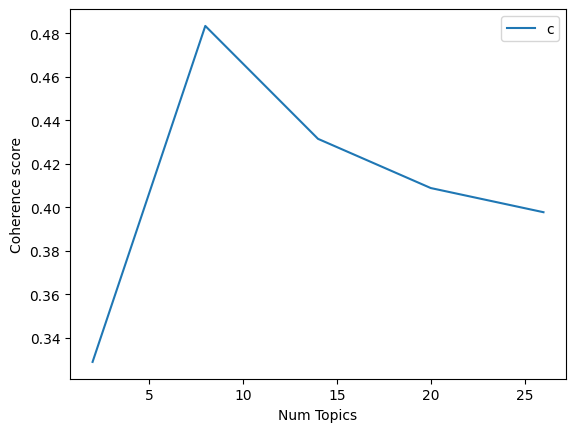

In [ ]:
# Evaluete optimal num_topics. Long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=30, step=6)

# Show graph
limit=30; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()